This code implements two different fuzzy logic control systems using the scikit-fuzzy library.
The first system models an air conditioner, taking room temperature and humidity as inputs to determine the appropriate fan speed.
The second system models a car headlight controller, using ambient light and distance to the vehicle ahead to adjust the brightness.
Both systems define fuzzy membership functions, create rules, compute outputs based on input values, and display the resulting fuzzy control surfaces and membership plots.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 35.0 MB/s eta 0:00:00
Fan Speed: 87.60
Brightness: 16.89


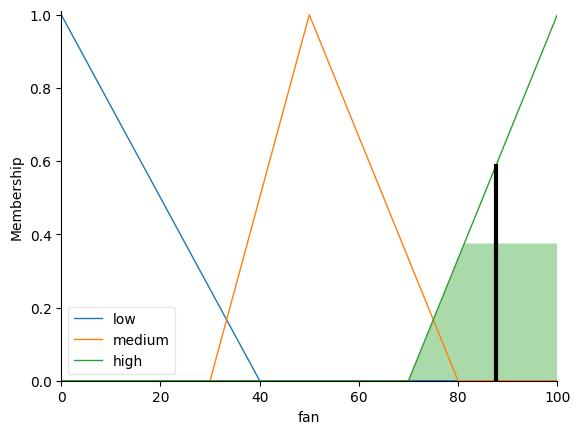

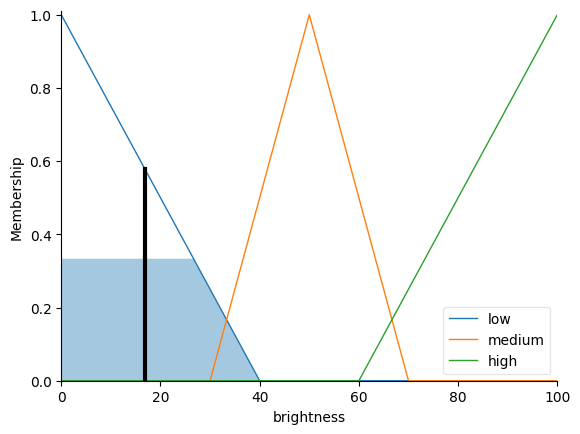

In [3]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


# Air Conditioner System
def air_conditioner():
    # Define input and output variables
    temperature = ctrl.Antecedent(np.arange(10, 41, 1), 'temperature')
    humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
    fan = ctrl.Consequent(np.arange(0, 101, 1), 'fan')

    # Define membership functions
    temperature['cold'] = fuzz.trimf(temperature.universe, [10, 10, 20])
    temperature['comfortable'] = fuzz.trimf(temperature.universe, [18, 25, 30])
    temperature['hot'] = fuzz.trimf(temperature.universe, [28, 40, 40])

    humidity['dry'] = fuzz.trimf(humidity.universe, [0, 0, 40])
    humidity['normal'] = fuzz.trimf(humidity.universe, [30, 50, 70])
    humidity['humid'] = fuzz.trimf(humidity.universe, [60, 100, 100])

    fan['low'] = fuzz.trimf(fan.universe, [0, 0, 40])
    fan['medium'] = fuzz.trimf(fan.universe, [30, 50, 80])
    fan['high'] = fuzz.trimf(fan.universe, [70, 100, 100])

    # Fuzzy rules
    rule1 = ctrl.Rule(temperature['cold'] & humidity['dry'], fan['low'])
    rule2 = ctrl.Rule(temperature['comfortable'] & humidity['normal'], fan['medium'])
    rule3 = ctrl.Rule(temperature['hot'] | humidity['humid'], fan['high'])

    # Build control system
    ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

    # Input values
    ac_sim.input['temperature'] = 32
    ac_sim.input['humidity'] = 75

    ac_sim.compute()

    print(f"Fan Speed: {ac_sim.output['fan']:.2f}")
    fan.view(sim=ac_sim)


# Car Headlight System
def headlight_system():
    # Define input/output variables
    ambient = ctrl.Antecedent(np.arange(0, 101, 1), 'ambient')
    distance = ctrl.Antecedent(np.arange(0, 51, 1), 'distance')
    brightness = ctrl.Consequent(np.arange(0, 101, 1), 'brightness')

    # Membership functions
    ambient['dark'] = fuzz.trimf(ambient.universe, [0, 0, 40])
    ambient['dim'] = fuzz.trimf(ambient.universe, [30, 50, 70])
    ambient['bright'] = fuzz.trimf(ambient.universe, [60, 100, 100])

    distance['near'] = fuzz.trimf(distance.universe, [0, 0, 15])
    distance['medium'] = fuzz.trimf(distance.universe, [10, 25, 40])
    distance['far'] = fuzz.trimf(distance.universe, [35, 50, 50])

    brightness['low'] = fuzz.trimf(brightness.universe, [0, 0, 40])
    brightness['medium'] = fuzz.trimf(brightness.universe, [30, 50, 70])
    brightness['high'] = fuzz.trimf(brightness.universe, [60, 100, 100])

    # Rules
    rule1 = ctrl.Rule(ambient['dark'] & distance['far'], brightness['high'])
    rule2 = ctrl.Rule(ambient['dim'], brightness['medium'])
    rule3 = ctrl.Rule(ambient['bright'] | distance['near'], brightness['low'])

    # Build control system
    hl_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    hl_sim = ctrl.ControlSystemSimulation(hl_ctrl)

    # Input values
    hl_sim.input['ambient'] = 20
    hl_sim.input['distance'] = 10

    hl_sim.compute()

    print(f"Brightness: {hl_sim.output['brightness']:.2f}")
    brightness.view(sim=hl_sim)


# Run both systems
air_conditioner()
headlight_system()
plt.show()

Another Example

Heater Power Output: 58.01%


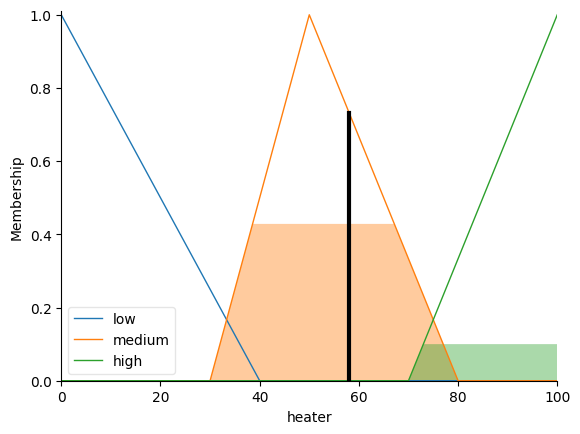

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ---------- 1. Define Fuzzy Variables ----------
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')  # °C
heater = ctrl.Consequent(np.arange(0, 101, 1), 'heater')  # Power %

# ---------- 2. Membership Functions ----------
temperature['cold']    = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['warm']    = fuzz.trimf(temperature.universe, [15, 22, 30])
temperature['hot']     = fuzz.trimf(temperature.universe, [25, 40, 40])

heater['low']   = fuzz.trimf(heater.universe, [0, 0, 40])
heater['medium']= fuzz.trimf(heater.universe, [30, 50, 80])
heater['high']  = fuzz.trimf(heater.universe, [70, 100, 100])

# ---------- 3. Fuzzy Rules ----------
rule1 = ctrl.Rule(temperature['cold'], heater['high'])
rule2 = ctrl.Rule(temperature['warm'], heater['medium'])
rule3 = ctrl.Rule(temperature['hot'], heater['low'])

# ---------- 4. Create Control System ----------
heater_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
heater_sim = ctrl.ControlSystemSimulation(heater_ctrl)

# ---------- 5. Provide Input and Compute ----------
heater_sim.input['temperature'] = 18  # Example input
heater_sim.compute()

print(f"Heater Power Output: {heater_sim.output['heater']:.2f}%")

# ---------- 6. Visualize ----------
heater.view(sim=heater_sim)
plt.show()
